In [1]:
import sys
from pathlib import Path
import seaborn as sns

PROJECT_ROOT = Path.cwd()
LIB_PATH = PROJECT_ROOT / "lib"
LIB_PATH_STR = str(LIB_PATH)

#print(f"LIB_PATH: {LIB_PATH_STR}")

if LIB_PATH_STR not in sys.path:
    sys.path.append(LIB_PATH_STR)



# Import your library
from plot.plot_lib import (             # type: ignore
    bluishColorList,
    plot_pivot_bar,
    plot_hist_hue,
    sns_pivot_heatmap,
    set_color_map
)

from clean.clean_lib import (           # type: ignore
    null_data, 
    most_frequent_values,number_unique_values ) 

Notebook Color Schema:


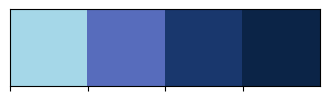

In [2]:
cmap_custom = set_color_map(bluishColorList)

In [3]:
import pandas as pd

train_df = pd.read_csv("./Data/train.csv")
test_df = pd.read_csv("./Data/test.csv")

In [4]:
display(train_df.head(3))

display(test_df.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## Missing data, Most Frequent Items, Unique Values

In [5]:
null_data(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Null,0,0,0,0,0,177,0,0,0,0,687,2
Percent Null,0.0,0.0,0.0,0.0,0.0,19.9,0.0,0.0,0.0,0.0,77.1,0.2
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [6]:
most_frequent_values(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Non-Null,891,891,891,891,891,714,891,891,891,891,204,889
Most frequent item,1,0,3,"Braund, Mr. Owen Harris",male,24.0,0,0,347082,8.05,B96 B98,S
Frequency,1,549,491,1,577,30,608,678,7,43,4,644
Percent from total non-null,0.112,61.616,55.107,0.112,64.759,4.202,68.238,76.094,0.786,4.826,1.961,72.441


In [7]:
number_unique_values(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Non-Null,891,891,891,891,891,714,891,891,891,891,204,889
Number of uniques,891,2,3,891,2,88,7,7,681,248,147,3



<div style="margin-left:7%;width:80%;">

### **Combining Train and Test Sets with a Dataset Identifier**

We merge the original Titanic training and test datasets into a single DataFrame so that we can apply consistent data cleaning, feature engineering, and exploratory analysis across both sets. After concatenation, we create a new column called `"set"` to keep track of each row’s origin:

* All rows are initially labeled `"train"`.
* Rows that belong to the original test dataset are identified because their `Survived` value is missing (`NaN`).
* These rows are relabeled as `"test"`.

This allows us to work with a unified dataset while still being able to distinguish train from test during analysis or modeling.

</div>

In [8]:
all_df = pd.concat([train_df,test_df],axis=0)
all_df["set"] = "train"

all_df.loc[all_df.Survived.isna(),"set"] = "test"

display(all_df.sample(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set
549,550,1.0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.75,NaN,S,train
288,289,1.0,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.00,NaN,S,train
587,588,1.0,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,B41,C,train



<div style="margin-left:7%;width:80%;">

## ⭐ **3. General Introduction — Train–Test Distribution Comparison**


</div>


## 3A. Sex

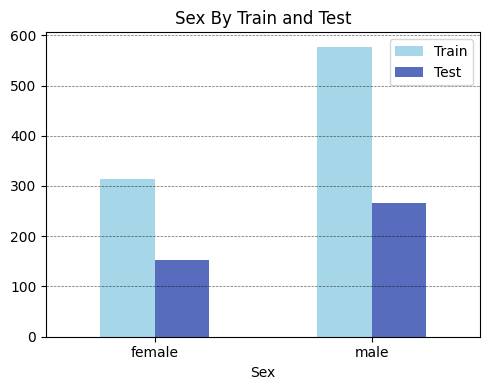

In [9]:
df_crosstab = pd.crosstab(index=all_df["Sex"],columns=all_df['set'])
df_crosstab = df_crosstab.reindex(columns=["train","test"])

title = "Sex By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(5,4),width=0.5,
                         title=title,legendLabels=labels)

plt.show()

## 3B. Pclass (Passenger Class)

set,train,test
Pclass,,
1,216,107
2,184,93
3,491,218


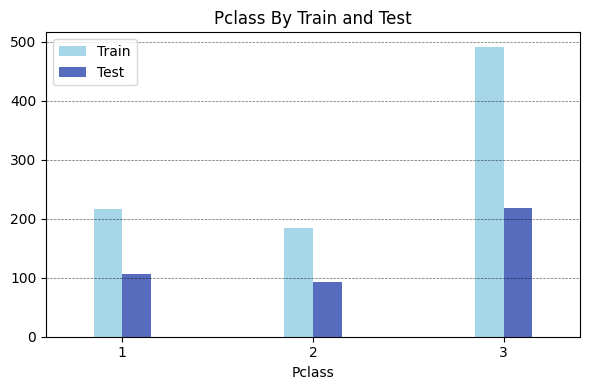

In [10]:
df_crosstab = pd.crosstab(index=all_df["Pclass"],columns=all_df["set"]) 
df_crosstab = df_crosstab.reindex(columns=["train","test"])

title = "Pclass By Train and Test"
labels = ["Train","Test"]

plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(6,4),width=0.3,
                         title=title,legendLabels=labels)
df_crosstab

## 3C. SibSp (Sibling Spouse)

set,train,test
SibSp,,
0,608,283
1,209,110
2,28,14
3,16,4
4,18,4
5,5,1
8,7,2


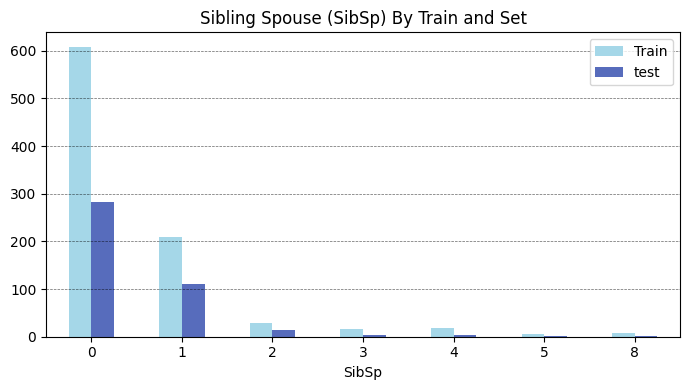

In [11]:
df_crosstab = pd.crosstab(index=all_df["SibSp"],columns=all_df["set"])

df_crosstab = df_crosstab.reindex(columns=["train","test"])

title = "Sibling Spouse (SibSp) By Train and Set"
labels = ["Train","test"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

df_crosstab

## 3D. Parch (Parent Child)

set,train,test
Parch,,
0,678,324
1,118,52
2,80,33
3,5,3
4,4,2
5,5,1
6,1,1
9,0,2


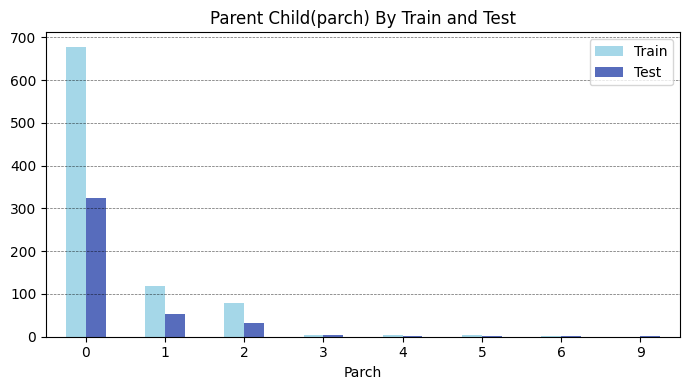

In [12]:
df_crosstab = pd.crosstab(index=all_df["Parch"],columns=all_df["set"])

# reindex or reorder columns
df_crosstab = df_crosstab.reindex(columns=["train","test"])

display(df_crosstab)

title = "Parent Child(parch) By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)
plt.show()

## 3E. Embarked

In [13]:
train_df.loc[train_df.Embarked.isna(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [14]:
# Drop rows where Embarked is missing
all_df = all_df.dropna(subset=["Embarked"]).reset_index(drop=True)
train_df = train_df.dropna(subset=["Embarked"]).reset_index(drop=True)


set,train,test
Embarked,,
C,168,102
Q,77,46
S,644,270


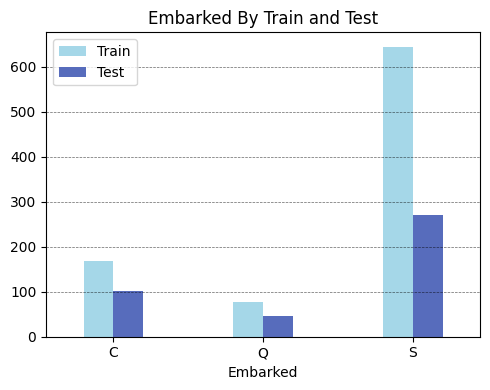

In [15]:
df_crosstab = pd.crosstab(index=all_df["Embarked"],columns=all_df["set"])
df_crosstab = df_crosstab.reindex(columns=["train","test"])
display(df_crosstab)

title = "Embarked By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(5,4),width=0.4,
                         title=title,legendLabels=labels)

plt.show()

## 3F. Age

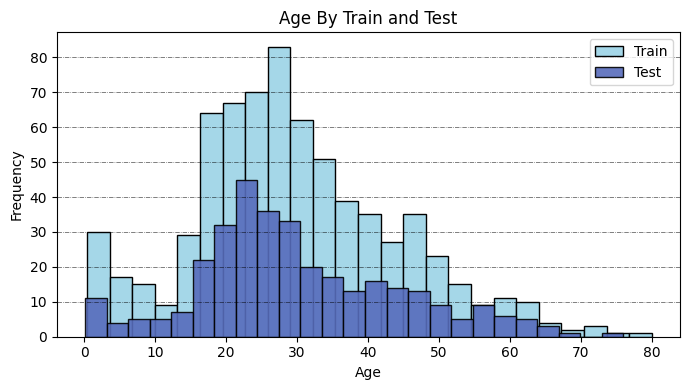

In [16]:
title = "Age By Train and Test"
labels = ["Train","Test"]

plt,_,_ = plot_hist_hue(all_df,feature="Age",hue="set",
                title=title,legendLabels=labels)
plt.show()

## 3G. Fare

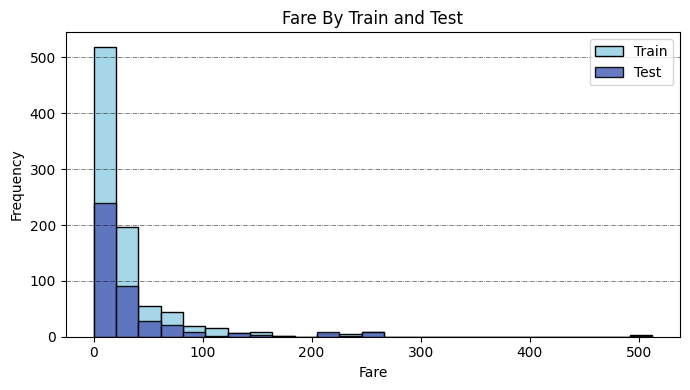

In [17]:
title = "Fare By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_hist_hue(all_df,feature="Fare",hue="set",
              title=title,legendLabels=labels)

## 4. Bivariate Analysis

### 4A. Sex and Survived

Survived,0.0,1.0
Sex,,
female,81,231
male,468,109


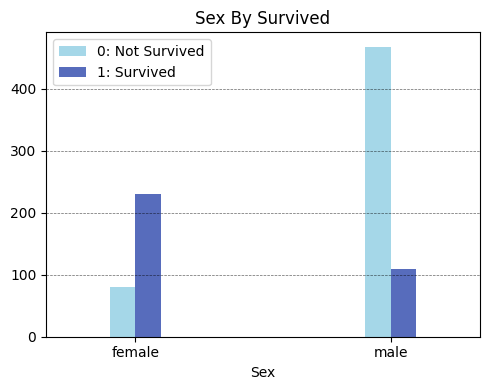

In [18]:
df_crosstab = pd.crosstab(index=all_df["Sex"],columns=all_df["Survived"])

display(df_crosstab)
title="Sex By Survived"
labels=["0: Not Survived","1: Survived"]

plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(5,4),width=0.2,
                           title=title,legendLabels=labels)

plt.show()

### 4B. Pclass and Survived

Survived,0.0,1.0
Pclass,,
1,80,134
2,97,87
3,372,119


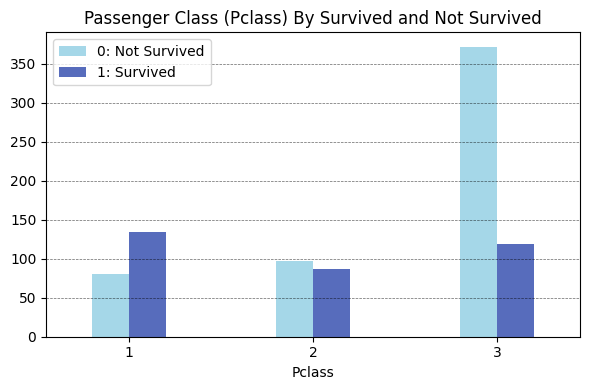

In [19]:
df_crosstab = pd.crosstab(index=all_df["Pclass"],columns=all_df["Survived"])
display(df_crosstab)

title = "Passenger Class (Pclass) By Survived and Not Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(6,4),width=0.4,
                         title=title,legendLabels=labels)

### 4C. SibSp (Siblings or Spouse) and Survived

Survived,0.0,1.0
SibSp,,
0,398,208
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


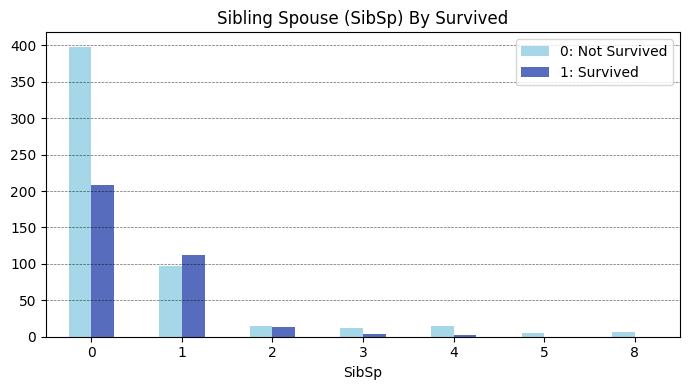

In [20]:
df_crosstab = pd.crosstab(index=all_df["SibSp"],columns=all_df["Survived"])
display(df_crosstab)

title = "Sibling Spouse (SibSp) By Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

### 4D. Embarked and Survived

<div style="margin-left:7%;width:75%;">

In the **Titanic dataset**, the `Embarked` column tells you **which port each passenger boarded the ship from**.

There are **three possible values**:

| Code  | Port Name       | Country            | Description                                     |
| ----- | --------------- | ------------------ | ----------------------------------------------- |
| **S** | **Southampton** | England (UK)       | The majority of passengers boarded here.        |
| **C** | **Cherbourg**   | France             | Wealthier passengers often embarked here.       |
| **Q** | **Queenstown**  | Ireland (now Cobh) | Typically emigrants and lower-class passengers. |

---


</div>


Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


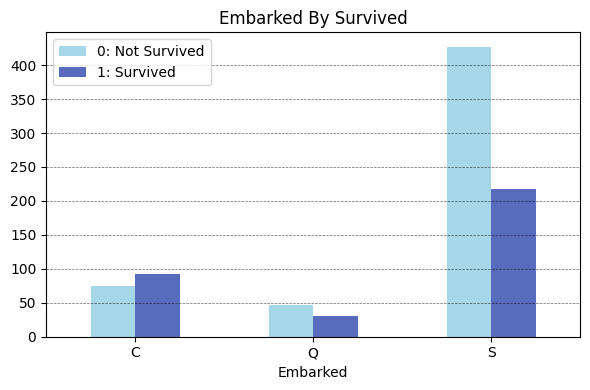

In [21]:
df_crosstab = pd.crosstab(index=train_df["Embarked"],columns=train_df["Survived"])

display(df_crosstab)

title = "Embarked By Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(6,4),
                         title=title,legendLabels=labels)

### 4E. Age and Survived (Continuous Variable)

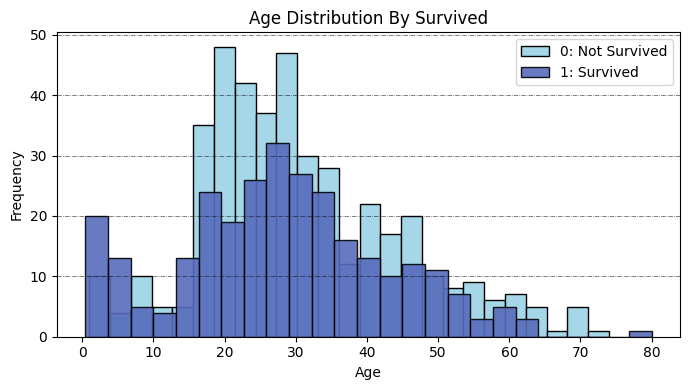

In [22]:
title="Age Distribution By Survived"
labels=["0: Not Survived","1: Survived"]

plt,_,_ = plot_hist_hue(train_df, feature="Age", hue="Survived",
                        title=title,legendLabels=labels)

### 4F. Fare and Survived (Continuous Variable)

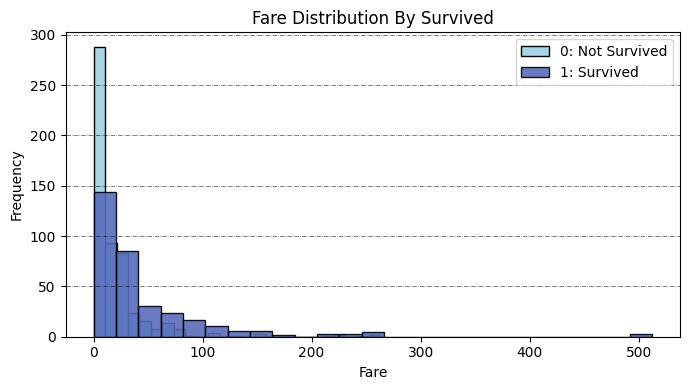

In [23]:
title="Fare Distribution By Survived"
labels=["0: Not Survived","1: Survived"]
plt,_,_ = plot_hist_hue(all_df, "Fare", hue="Survived",
                        title=title,legendLabels=labels)

### 4G. Family Size (Feature Engineering; discrete variable)


<div style="margin-left:6%;width:80%" >


### The columns involved

In the Titanic dataset, you have:

| Column  | Meaning                                       |
| ------- | --------------------------------------------- |
| `SibSp` | Number of **siblings** and **spouses** aboard |
| `Parch` | Number of **parents** and **children** aboard |

So:

* `SibSp = 1` → the passenger had one sibling/spouse on board
* `Parch = 2` → the passenger had two parents/children on board

But both exclude the passenger themself.

---

### Why we add them up (and +1)

```python
all_df["Family Size"] = all_df["SibSp"] + all_df["Parch"] + 1
```



1. `SibSp + Parch` = number of *relatives* aboard
2. `+1` = include the passenger themself

That gives the **total number of family members traveling together**, *including the passenger* — a simple but powerful engineered feature called **Family Size**.



</div>


In [24]:
all_df['Family Size'] = all_df['SibSp'] + all_df['Parch'] + 1
train_df['Family Size'] = train_df['SibSp'] + train_df['Parch'] + 1

In [25]:
all_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set,Family Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,1


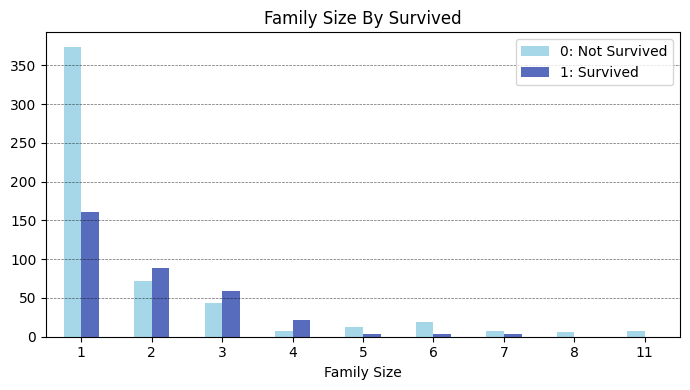

In [26]:
df_crosstab = pd.crosstab(index=train_df["Family Size"],columns=train_df["Survived"])

title = "Family Size By Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

### 4H. Age Interval


**Age Interval Encoding**

The *Age Interval* column categorizes individuals into discrete age bands based on predefined thresholds that represent broad life-stage groupings.

**Interval definitions**

| Interval | Age Range        | Description               |
|----------|------------------|---------------------------|
| 0        | Age ≤ 16         | children                  |
| 1        | 16 < Age ≤ 32    | young adults              |
| 2        | 32 < Age ≤ 48    | early middle-aged adults  |
| 3        | 48 < Age ≤ 64    | late middle-aged adults   |
| 4        | Age > 64         | seniors                   |


Missing age values (NaN) are explicitly preserved as **NA** to avoid misclassification and to maintain data integrity.






In [27]:
null_data(all_df[["Age"]])

,Age
Total Null,263
Percent Null,20.1
Types,float64


In [28]:
all_df["Age Interval"] = 0
all_df.loc[all_df["Age"]<=16,"Age Interval"] = 0
all_df.loc[(all_df["Age"]>16) & (all_df["Age"]<=32), "Age Interval"] = 1
all_df.loc[(all_df["Age"]>32) & (all_df["Age"]<=48), "Age Interval"] = 2
all_df.loc[(all_df["Age"]>48) & (all_df["Age"]<=64), "Age Interval"] = 3
all_df.loc[all_df["Age"]>64, "Age Interval"] = 4
all_df.loc[all_df["Age"].isna(),"Age Interval"] = pd.NA

train_df["Age Interval"] = 0
train_df.loc[train_df["Age"] <= 16, "Age Interval"] = 0
train_df.loc[(train_df["Age"] > 16) & (train_df["Age"] <= 32), "Age Interval"] = 1
train_df.loc[(train_df["Age"] > 32) & (train_df["Age"] <= 48), "Age Interval"] = 2
train_df.loc[(train_df["Age"] > 48) & (train_df["Age"] <= 64), "Age Interval"] = 3
train_df.loc[train_df["Age"] > 64, "Age Interval"] = 4

train_df.loc[train_df["Age"].isna(), "Age Interval"] = pd.NA

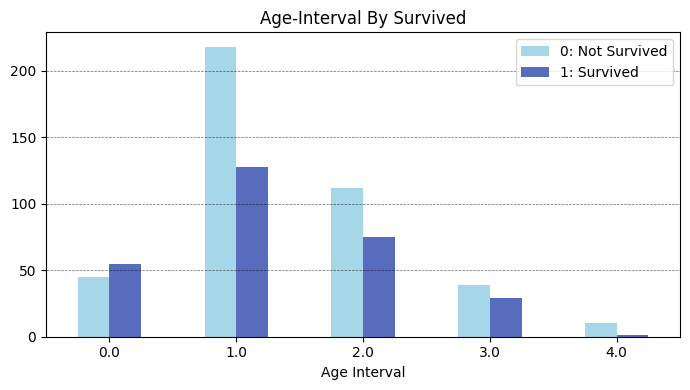

In [29]:
df_crosstab = pd.crosstab(index=train_df["Age Interval"],columns=train_df["Survived"])

title = "Age-Interval By Survived"
labels = ["0: Not Survived","1: Survived"]

plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

### 4I. Fare 

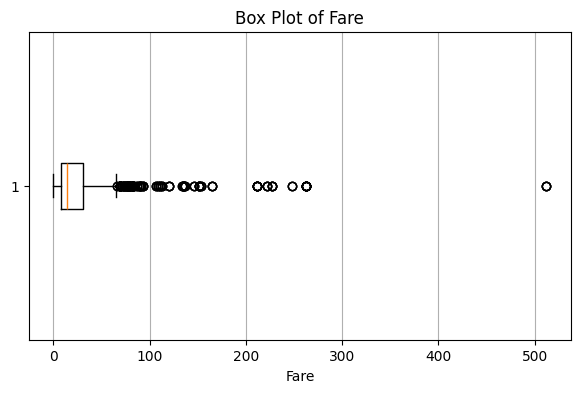

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.boxplot(all_df["Fare"].dropna(), vert=False)


plt.grid(axis="x")
plt.title("Box Plot of Fare")
plt.xlabel("Fare")
plt.show()


> The Fare distribution is strongly right-skewed with a long right tail. Most observations cluster >at lower values, while a small number of high fares extend far beyond the upper quartile, >producing many high-end outliers under the IQR rule.

In [31]:
all_df['Fare'].quantile([0.25, 0.5, 0.75])

0.25     7.8958
0.50    14.4542
0.75    31.2750
Name: Fare, dtype: float64

| Fare Interval      | Socioeconomic Meaning                         |
| ------------------ | --------------------------------------------- |
| **0 (≤ 7.91)**     | Very poor, 3rd class, mostly men, lower decks |
| **1 (7.91–14.45)** | Lower middle, still mostly 3rd class          |
| **2 (14.45–31)**   | Middle class travelers                        |
| **3 (> 31)**       | Wealthiest passengers, mainly 1st class       |


In [32]:
all_df['Fare Interval'] = pd.qcut(all_df['Fare'], q=4, labels=[0,1,2,3])
train_df['Fare Interval'] = pd.qcut(train_df['Fare'], q=4, labels=[0,1,2,3])

null_data(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Age Interval,Fare Interval
Total Null,0,0,0,0,0,177,0,0,0,0,687,0,0,177,0
Percent Null,0.0,0.0,0.0,0.0,0.0,19.9,0.0,0.0,0.0,0.0,77.3,0.0,0.0,19.9,0.0
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object,int64,float64,category


Survived,0,1
Fare Interval,,
0,179,44
1,156,68
2,121,101
3,93,127


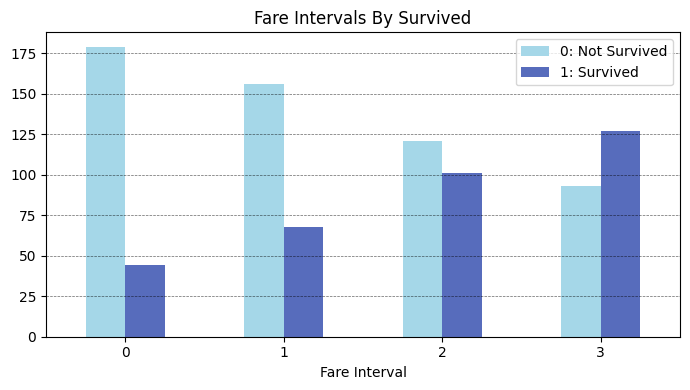

In [33]:
df_crosstab = pd.crosstab(index=train_df["Fare Interval"],columns=train_df["Survived"])
display(df_crosstab)

title = "Fare Intervals By Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

### 4J. Deck -- from Cabin

In [34]:
all_df["Cabin"].value_counts(dropna=False)

Cabin
NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: count, Length: 186, dtype: int64

<div style="margin-left:6%;width:70%;">

### Why `Cabin` was transformed into `Deck`

The original `Cabin` feature contains **high-cardinality, sparsely populated values** (e.g., `C23 C25 C27`) and a **large number of missing entries**, making it noisy and difficult to analyze directly.

The **first character of the cabin code** represents the ship’s **deck level** (`A`, `B`, `C`, …), which captures meaningful spatial and socioeconomic information.

By extracting this letter and renaming the feature to `Deck`, we:

* Reduce cardinality to a small, interpretable set of categories  
* Preserve signal relevant to survival (deck location correlates with class and lifeboat access)  
* Improve robustness by grouping noisy cabin variants  
* Handle missing values explicitly via an `"Unknown"` category  

This turns a **raw identifier-like field** into a **clean, domain-informed categorical feature** suitable for EDA and modeling.

</div>


In [35]:
def get_deck(text):
    try:
        return text[0]
    except Exception as ex:
        return "Unknown"

In [36]:
all_df["Deck"] = all_df["Cabin"].apply(lambda x: get_deck(x))
train_df["Deck"] = train_df["Cabin"].apply(lambda x: get_deck(x))

In [37]:
display(all_df["Deck"].value_counts(dropna=False))
print("-------------------")
display(train_df["Deck"].value_counts(dropna=False))

Deck
Unknown    1014
C            94
B            63
D            46
E            41
A            22
F            21
G             5
T             1
Name: count, dtype: int64

-------------------


Deck
Unknown    687
C           59
B           45
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64

Survived,0,1
Deck,,
A,8,7
B,12,33
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0
Unknown,481,206


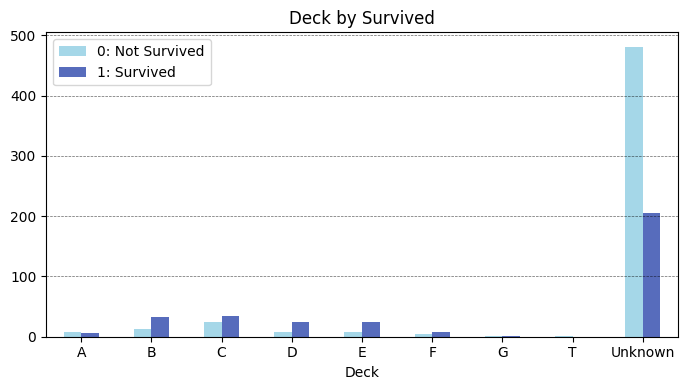

In [38]:
df_crosstab = pd.crosstab(index=train_df['Deck'],columns=train_df['Survived'])
display(df_crosstab)

title = "Deck by Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

### 4K. Sex + Pclass (Feature Engineering)

In [39]:
all_df["Sex_Pclass"] = all_df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)

train_df["Sex_Pclass"] = train_df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)

In [40]:
train_df["Sex_Pclass"].dtype 

dtype('O')

#### Encode Sex–Class Interaction as an Ordered Categorical Feature

In [41]:
ordered_cats = ["M_C1","M_C2","M_C3","F_C1","F_C2","F_C3"]

all_df["Sex_Pclass"] = pd.Categorical(
    all_df["Sex_Pclass"],
    categories=ordered_cats,
    ordered=True
)

train_df["Sex_Pclass"] = pd.Categorical(
    train_df["Sex_Pclass"],
    categories=ordered_cats,
    ordered=True
)


In [42]:
train_df["Sex_Pclass"].dtype

CategoricalDtype(categories=['M_C1', 'M_C2', 'M_C3', 'F_C1', 'F_C2', 'F_C3'], ordered=True, categories_dtype=object)

Survived,0,1
Sex_Pclass,,
M_C1,77,45
M_C2,91,17
M_C3,300,47
F_C1,3,89
F_C2,6,70
F_C3,72,72


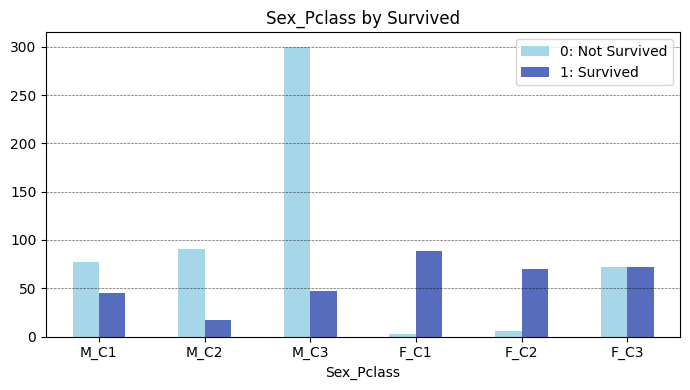

In [43]:
df_crosstab = pd.crosstab(index=train_df["Sex_Pclass"],columns=train_df["Survived"])
display(df_crosstab)

title = "Sex_Pclass by Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)
plt.show()

## 5. Names

In [44]:
all_df.Name.sample(20)

968                                Doyle, Miss. Elizabeth
953                           Ryerson, Master. John Borie
208                                      Blank, Mr. Henry
502                        Laitinen, Miss. Kristina Sofia
1035                          Hilliard, Mr. Herbert Henry
741                 Ryerson, Miss. Susan Parker "Suzette"
1097                        Rosenbaum, Miss. Edith Louise
976                            Badman, Miss. Emily Louisa
1130                        Christy, Mrs. (Alice Frances)
668     Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)
145          Andersson, Mr. August Edvard ("Wennerstrom")
1273                       Wheeler, Mr. Edwin Frederick""
1188                                  Johansson, Mr. Nils
326                               Ball, Mrs. (Ada E Hall)
754                             Hamalainen, Master. Viljo
1203                White, Mrs. John Stuart (Ella Holmes)
105                      Salkjelsvik, Miss. Anna Kristine
644           

In [45]:
def parse_names(row):
    try:
        text = row["Name"]
        #print(f"-- text: {text}")
        split_text = text.split(",")
        family_name = split_text[0]
        next_text = split_text[1]
        split_text = next_text.split(".")
        title = (split_text[0] + ".").lstrip().rstrip()
        next_text = split_text[1]
        if "(" in next_text:
            split_text = next_text.split("(")
            given_name = split_text[0]
            maiden_name = split_text[1].rstrip(")")
            return pd.Series([family_name,title,given_name,maiden_name])
        else:
            given_name = next_text
            return pd.Series([family_name,title,given_name,None])
    except Exception as ex:
        print(f"Exception: {ex}")

In [46]:
all_df[:2].apply(lambda row: parse_names(row),axis=1)

,0,1,2,3
0,Braund,Mr.,Owen Harris,None
1,Cumings,Mrs.,John Bradley,Florence Briggs Thayer


In [47]:

all_df[['Family Name','Title','Given Name','Maiden Name']] = \
                    all_df.apply(lambda row: parse_names(row),axis=1)


columns = ['Sex','Family Name','Title','Given Name','Maiden Name']
all_df.loc[:3,columns]

,Sex,Family Name,Title,Given Name,Maiden Name
0,male,Braund,Mr.,Owen Harris,None
1,female,Cumings,Mrs.,John Bradley,Florence Briggs Thayer
2,female,Heikkinen,Miss.,Laina,None
3,female,Futrelle,Mrs.,Jacques Heath,Lily May Peel


In [48]:

train_df[['Family Name','Title','Given Name','Maiden Name']] = \
                    all_df.apply(lambda row: parse_names(row),axis=1)


columns = ['Sex','Family Name','Title','Given Name','Maiden Name']
train_df.loc[:3,columns]

,Sex,Family Name,Title,Given Name,Maiden Name
0,male,Braund,Mr.,Owen Harris,None
1,female,Cumings,Mrs.,John Bradley,Florence Briggs Thayer
2,female,Heikkinen,Miss.,Laina,None
3,female,Futrelle,Mrs.,Jacques Heath,Lily May Peel


In [49]:
train_df.Title.value_counts(dropna=False)

Title
Mr.              517
Miss.            181
Mrs.             124
Master.           40
Dr.                7
Rev.               6
Mlle.              2
Major.             2
Col.               2
the Countess.      1
Capt.              1
Ms.                1
Sir.               1
Lady.              1
Mme.               1
Don.               1
Jonkheer.          1
Name: count, dtype: int64

<div style="margin-left:7%;width:75%;">

# Summary Table (Simplified Meaning)

| Title                                              | Meaning                            |
| -------------------------------------------------- | ---------------------------------- |
| Mr.                                                | Adult male                         |
| Miss.                                              | Unmarried female                   |
| Mrs.                                               | Married female                     |
| Master.                                            | Male child                         |
| Rev.                                               | Clergyman                          |
| Dr.                                                | Doctor / academic                  |
| Col., Major, Capt.                                 | Military officers                  |
| Mlle., Mme.                                        | French titles (Miss / Mrs.)        |
| Ms.                                                | Woman (marital status unspecified) |
| Lady., Sir., the Countess., Don., Dona., Jonkheer. | Nobility / aristocracy             |

---

# Why Titles Matter in Titanic Analysis

They correlate strongly with:

* **Survival probability**
* **Gender**
* **Age**
* **Social class**
* **Family structure**

Titles were one of the **top predictive features** in the famous Kaggle Titanic competition.

</div>

### 5A. Title vs Sex Heatmap

Sex,female,male
Title,,
Capt.,0,1
Col.,0,4
Don.,0,1
Dona.,1,0
Dr.,1,7
Jonkheer.,0,1
Lady.,1,0
Major.,0,2
Master.,0,61


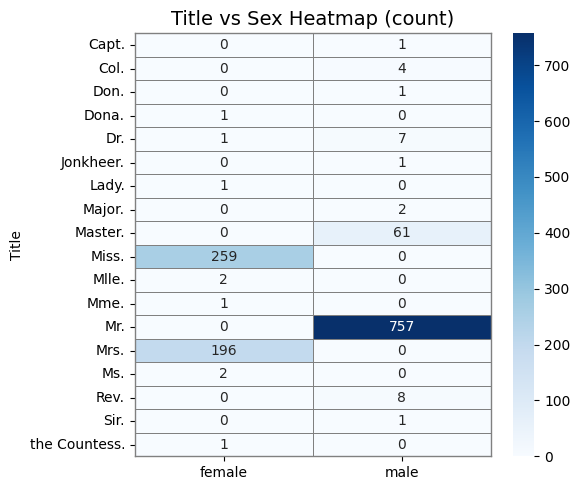

In [50]:
df_crosstab = pd.crosstab(index=all_df["Title"],columns=all_df["Sex"])
display(df_crosstab)

title = "Title vs Sex Heatmap (count)"
xlabel, ylabel = "", "Title"
plt,_,_ = sns_pivot_heatmap(df_crosstab,title=title,xLabel=xlabel,yLabel=ylabel)
plt.show()

### 5B. Title vs SibSp Heatmap

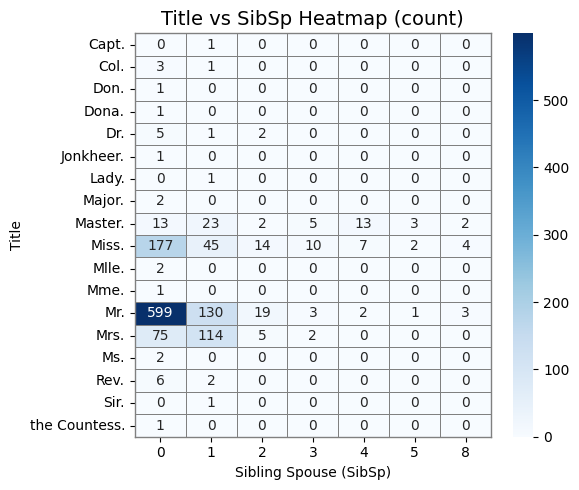

In [51]:
df_crosstab = pd.crosstab(index=all_df["Title"],columns=all_df["SibSp"])

title = "Title vs SibSp Heatmap (count)"
xlabel, ylabel = "Sibling Spouse (SibSp)", "Title"

plt,_,_ = sns_pivot_heatmap(df_crosstab,
                            title=title,xLabel=xlabel,yLabel=ylabel)

### 5C. Title vs ParentChild (Parch) Heatmap

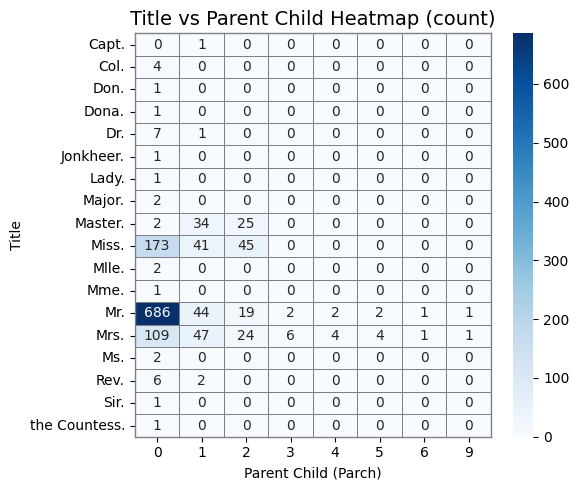

In [52]:
df_crosstab = pd.crosstab(all_df['Title'], all_df['Parch'])
title = "Title vs Parent Child Heatmap (count)"
xlabel,ylabel = "Parent Child (Parch)","Title"

plt,_,_ = sns_pivot_heatmap(df_crosstab,
                            title=title,xLabel=xlabel,yLabel=ylabel)

### 5D. Title vs Family Size Heatmap

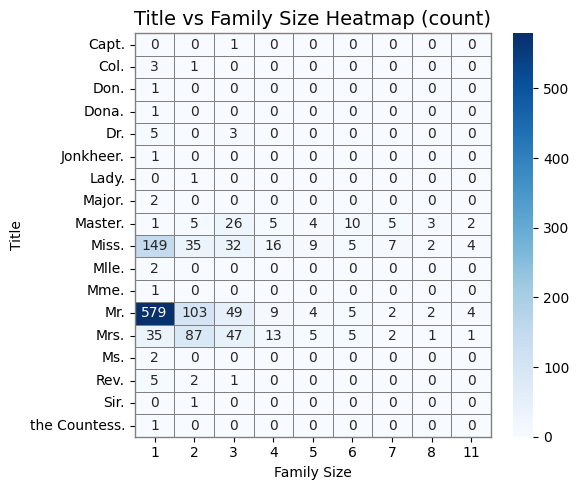

In [53]:
df_crosstab = pd.crosstab(all_df['Title'], all_df['Family Size'])
title = "Title vs Family Size Heatmap (count)"
xlabel , ylabel = "Family Size" , "Title"
plt,_,_ = sns_pivot_heatmap(df_crosstab,
                            title=title,xLabel=xlabel,yLabel=ylabel)

### 5E. Title vs Pclass Heatmap

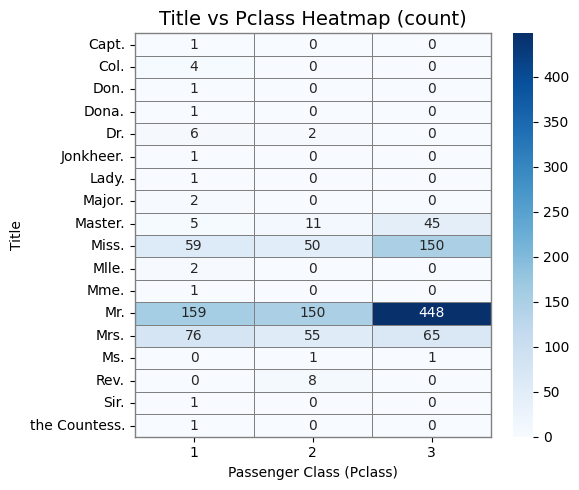

In [54]:
df_crosstab = pd.crosstab(all_df["Title"],all_df["Pclass"])

title = "Title vs Pclass Heatmap (count)"
xlabel, ylabel = "Passenger Class (Pclass)", "Title"

plt,_,_ = sns_pivot_heatmap(df_crosstab,
                            title=title,xLabel=xlabel,yLabel=ylabel)

## Deep dive into families data

We would like to understand what happened with different families, we will follow their fate through the data.

Let's look first to few large families.

In [55]:
sel_columns = ["Name", "Sex","Age", "Title", "Family Name", "Given Name", "Maiden Name",
               "SibSp", "Parch", "Family Size", "Ticket", "Cabin", "Pclass", "Survived"]

In [56]:
all_df["Family Name"].value_counts()[0:5]

Family Name
Sage         11
Andersson    11
Goodwin       8
Asplund       8
Davies        7
Name: count, dtype: int64

In [57]:
all_df.loc[all_df["Family Name"]=="Andersson"][sel_columns].sort_values(by=["Family Size", "Ticket", "Age"],
                                                                         ascending=False)

,Name,Sex,Age,Title,Family Name,Given Name,Maiden Name,SibSp,Parch,Family Size,Ticket,Cabin,Pclass,Survived
1103,"Andersson, Miss. Ida Augusta Margareta",female,38.0,Miss.,Andersson,Ida Augusta Margareta,None,4,2,7,347091,NaN,3,NaN
13,"Andersson, Mr. Anders Johan",male,39.0,Mr.,Andersson,Anders Johan,None,1,5,7,347082,NaN,3,0.0
609,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,Mrs.,Andersson,Anders Johan,Alfrida Konstantia Brogren,1,5,7,347082,NaN,3,0.0
541,"Andersson, Miss. Sigrid Elisabeth",female,11.0,Miss.,Andersson,Sigrid Elisabeth,None,4,2,7,347082,NaN,3,0.0
540,"Andersson, Miss. Ingeborg Constanzia",female,9.0,Miss.,Andersson,Ingeborg Constanzia,None,4,2,7,347082,NaN,3,0.0
812,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,Miss.,Andersson,Ebba Iris Alfrida,None,4,2,7,347082,NaN,3,0.0
848,"Andersson, Master. Sigvard Harald Elias",male,4.0,Master.,Andersson,Sigvard Harald Elias,None,4,2,7,347082,NaN,3,0.0
118,"Andersson, Miss. Ellis Anna Maria",female,2.0,Miss.,Andersson,Ellis Anna Maria,None,4,2,7,347082,NaN,3,0.0
67,"Andersson, Miss. Erna Alexandra",female,17.0,Miss.,Andersson,Erna Alexandra,None,4,2,7,3101281,NaN,3,1.0
145,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,Mr.,Andersson,August Edvard,"""Wennerstrom""",0,0,1,350043,NaN,3,1.0


In [58]:
all_df.loc[all_df["Family Name"]=="Sage"][sel_columns].sort_values(by=["Family Size", "Ticket", "Age"], ascending=False)

,Name,Sex,Age,Title,Family Name,Given Name,Maiden Name,SibSp,Parch,Family Size,Ticket,Cabin,Pclass,Survived
1249,"Sage, Master. William Henry",male,14.5,Master.,Sage,William Henry,None,8,2,11,CA. 2343,NaN,3,NaN
158,"Sage, Master. Thomas Henry",male,NaN,Master.,Sage,Thomas Henry,None,8,2,11,CA. 2343,NaN,3,0.0
179,"Sage, Miss. Constance Gladys",female,NaN,Miss.,Sage,Constance Gladys,None,8,2,11,CA. 2343,NaN,3,0.0
200,"Sage, Mr. Frederick",male,NaN,Mr.,Sage,Frederick,None,8,2,11,CA. 2343,NaN,3,0.0
323,"Sage, Mr. George John Jr",male,NaN,Mr.,Sage,George John Jr,None,8,2,11,CA. 2343,NaN,3,0.0
791,"Sage, Miss. Stella Anna",female,NaN,Miss.,Sage,Stella Anna,None,8,2,11,CA. 2343,NaN,3,0.0
844,"Sage, Mr. Douglas Bullen",male,NaN,Mr.,Sage,Douglas Bullen,None,8,2,11,CA. 2343,NaN,3,0.0
861,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,Miss.,Sage,"Dorothy Edith ""Dolly""",None,8,2,11,CA. 2343,NaN,3,0.0
1077,"Sage, Miss. Ada",female,NaN,Miss.,Sage,Ada,None,8,2,11,CA. 2343,NaN,3,NaN
1231,"Sage, Mr. John George",male,NaN,Mr.,Sage,John George,None,1,9,11,CA. 2343,NaN,3,NaN


Let's understand more about the special case of the women with a Dr. Title. This is rather rare for that period.

In [59]:
all_df.loc[(all_df['Title'] == 'Dr.') & (all_df['Sex'] == 'female')][sel_columns]

,Name,Sex,Age,Title,Family Name,Given Name,Maiden Name,SibSp,Parch,Family Size,Ticket,Cabin,Pclass,Survived
795,"Leader, Dr. Alice (Farnham)",female,49.0,Dr.,Leader,Alice,Farnham,0,0,1,17465,D17,1,1.0


Let's see if she is traveling alone in cabin D17.

In [60]:
all_df.loc[all_df['Cabin'] == 'D17'][sel_columns]

,Name,Sex,Age,Title,Family Name,Given Name,Maiden Name,SibSp,Parch,Family Size,Ticket,Cabin,Pclass,Survived
795,"Leader, Dr. Alice (Farnham)",female,49.0,Dr.,Leader,Alice,Farnham,0,0,1,17465,D17,1,1.0
860,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,Mrs.,Swift,Frederick Joel,Margaret Welles Barron,0,0,1,17466,D17,1,1.0


She is actually traveling with a Mrs. Swift, a woman companion, in the same 1st class cabin, on a separate ticket. They both survived.

## 6. WordCloud

In [61]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white",
                         colormap=cmap_custom).generate(text)
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()    

### 6.1 Family Name - wordcloud

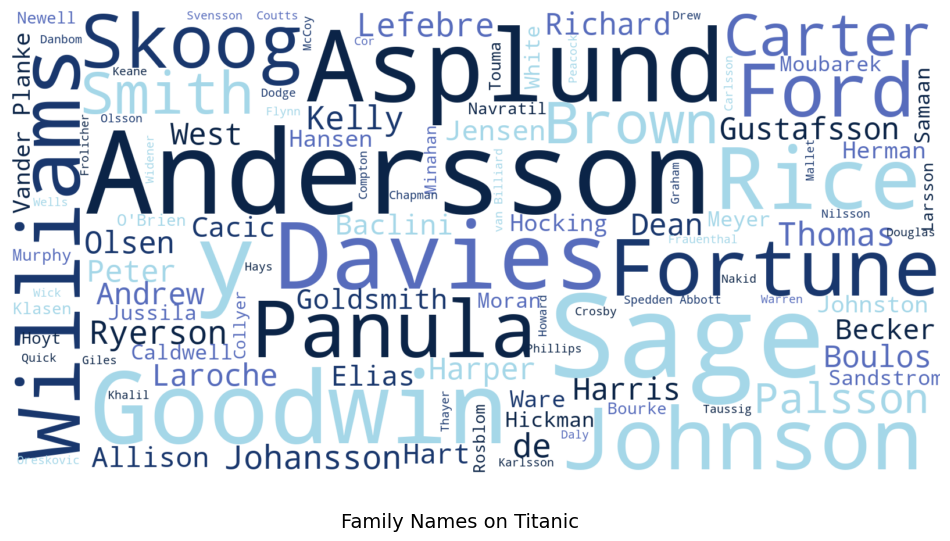

In [62]:
show_wordcloud(all_df["Family Name"], title="Family Names on Titanic")

### 6.2 Girls and Young Women WordCloud

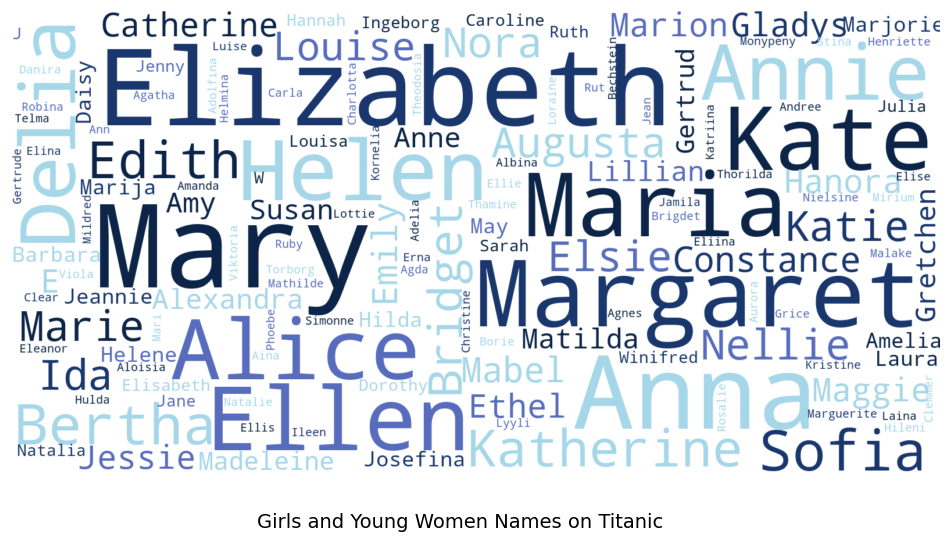

In [63]:
show_wordcloud(all_df.loc[all_df["Title"].isin(["Miss.", "Mlle."])]["Given Name"], title="Girls and Young Women Names on Titanic")

## Mulitivariate analysis

In [64]:
def plot_count_distrib_pairs(data_df, f_one, f_two, title, hue="Survived"):
    sns.set_style("whitegrid", {'axes.grid' : True})
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    sns.kdeplot(x=data_df[f_one], y=data_df[f_two], hue=data_df[hue], palette=bluishColorList[:2])
    ax.set_zlabel('Density')
    ax.set_title(title)
    plt.show()    

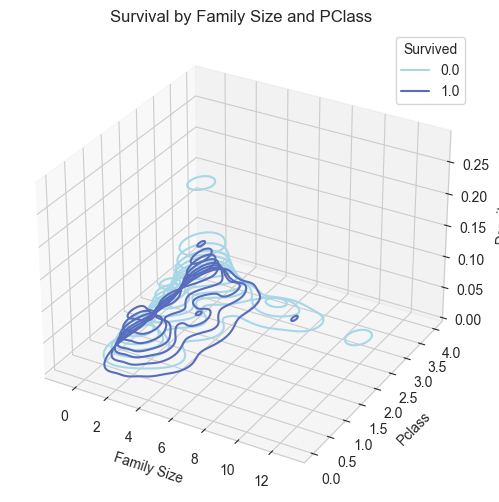

In [65]:
plot_count_distrib_pairs(all_df, "Family Size", "Pclass", "Survival by Family Size and PClass")

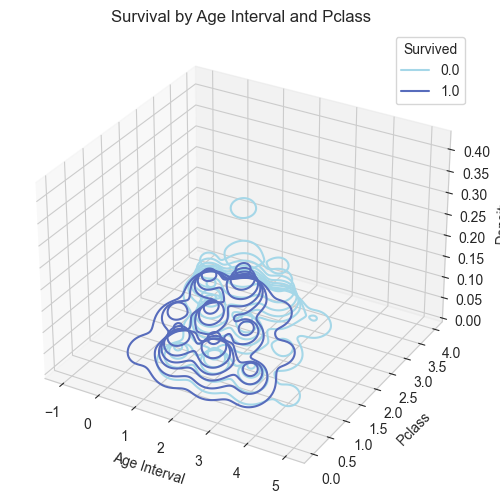

In [66]:
plot_count_distrib_pairs(all_df, "Age Interval", "Pclass", "Survival by Age Interval and Pclass")